In [1]:
%matplotlib notebook
import argparse
import torch
import math
import argparse
import os, os.path, shutil
import pathlib
import random
import pandas as pd
import numpy as np
import h5py
import random
import os
import argparse
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import torchvision
from torch.nn import functional as F
from torch import topk
import skimage.transform
from torch.optim import lr_scheduler
from tqdm import tqdm
import math
import pandas as pd
from numpy import genfromtxt
print("Modules loaded")

Modules loaded


In [141]:
csv = "M:/DeepLearning Projects/NephNet/Datasets/Trial F59/3d_all 2nd segmentation/raw/images_ 1_60c29673-de39-4ca9-90f8-08f173b8856c_1576527546466.csv"
#csv = "M:/DeepLearning Projects/NephNet/Datasets/f59_testdata/All_3D/images_ 1_f59crop.csv"
class_csv = "f33_s2s3.csv"
csv_folder = "C:/Users/awoloshu/Desktop/datasets/NephNet/3d_all/combine_all/"
csv = os.path.join(csv_folder, class_csv)
my_data = genfromtxt(csv, delimiter=',')
print(my_data.shape)
outputcount = 0

(10871, 7170)


<IPython.core.display.Javascript object>


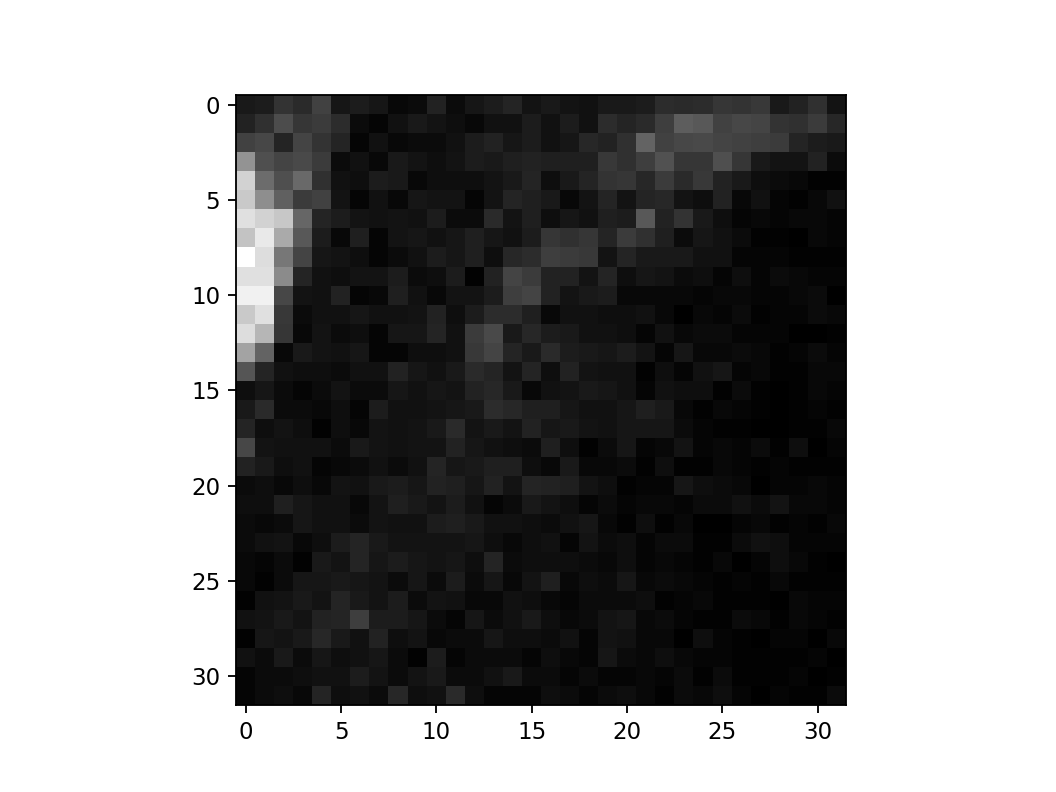

In [46]:
img = my_data[1, 2:]
img = np.reshape(img, (7,32,32), order = 'C')
img = img[3]
plt.figure()
plt.imshow(img, cmap = 'gray')

<IPython.core.display.Javascript object>


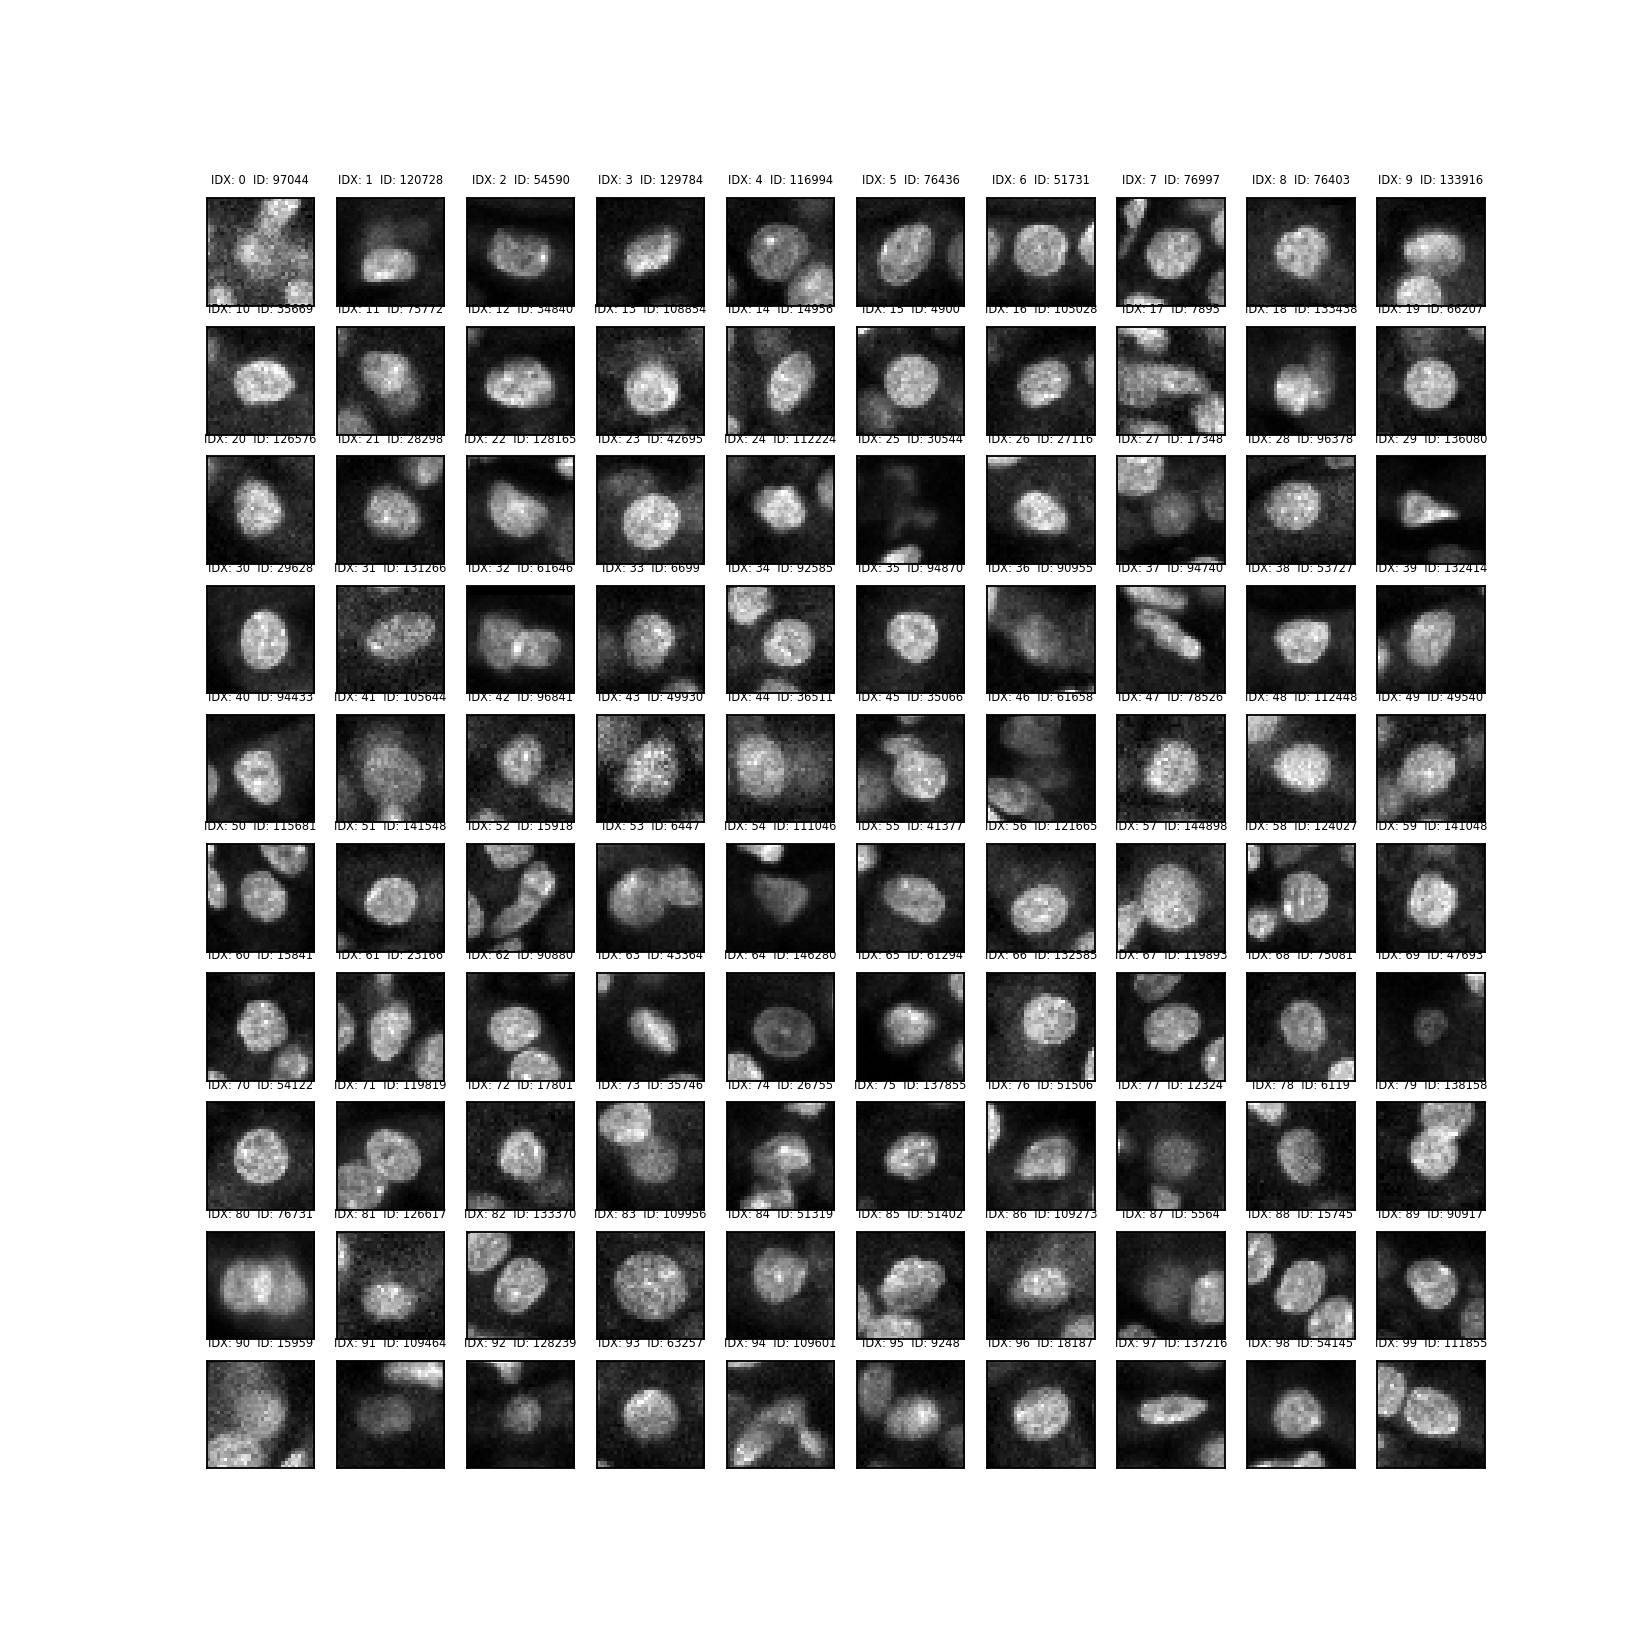

In [144]:
train_img = my_data[:, :]
imgs = []
labels = []
predictions = []
pw = 10
pl = 10
idxs = np.random.choice(range(my_data.shape[0]), pw*pl)
#idxs = range(100)
for idx in idxs:
    img = train_img[idx, 2:]
    mask = img < 0
    img[mask] = img[mask] + 256
    label = str(int(train_img[idx, 1]))
    img = img = np.reshape(img, (7,32,32), order = 'C')
    middle_slice = int(img.shape[0] / 2-1)
    img = np.sum(img, axis = 0)
    #imgs.append(img[middle_slice])
    imgs.append(img)
    labels.append(label)


fig, axs = plt.subplots(pl, pw, figsize=(10,10),facecolor='w', edgecolor='k')
axs = axs.ravel()
#fig.subplots_adjust(hspace = 0.25, wspace= -0.75)

for i in range(pw*pl):
    title = "IDX: {}  ID: {}".format(i, labels[i])
    axs[i].imshow(imgs[i], cmap = plt.cm.gray)
    axs[i].set_title(title, fontsize = 5)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

In [145]:
#Take ID's and add to clean folder
idxs_exclude = [97,94,92,90,86,69,46,37,29,27,25,0]
output_array = []

for i, idx in enumerate(idxs):
    if i in idxs_exclude:
        print("Skipping {} {}".format(i,idx))
    else:
        output_array.append(my_data[idx])
    
output_array = np.array(output_array)    
print(output_array.shape)
class_csv_new = str(outputcount) + class_csv
outputcount+=1
filename = "C:/Users/awoloshu/Desktop/datasets/NephNet/3d_all/combine_all/cleaned/"
new_csv = os.path.join(filename, class_csv_new)
with open(new_csv, 'w') as fp:
    np.savetxt(fp, output_array, delimiter=",", fmt='%d')
    
print("File created")

Skipping 0 10230
Skipping 25 9526
Skipping 27 724
Skipping 29 2455
Skipping 37 4097
Skipping 46 870
Skipping 69 5470
Skipping 86 10102
Skipping 90 4563
Skipping 92 3337
Skipping 94 9875
Skipping 97 5035
(88, 7170)
File created
